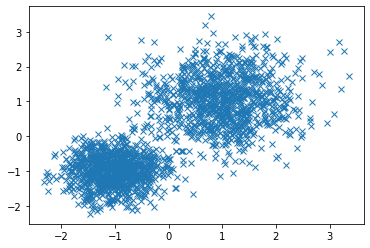

In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
%matplotlib inline

# 读取dataset1
dict = sio.loadmat('dataset1')
samples = dict['samples']
# labels = dict['labels']
# labels = labels.reshape(-1)  #转换矩阵形状
# num, dim = samples.shape  #数据个数，维数
# 数据显示
plt.plot(samples[:, 0], samples[:, 1], 'x')


In [2]:
# 课程演示中的kmeans2
import time


def kmeans2(samples, K, max_iter=20):
    # vectorized implementation, high efficiency
    N, D = samples.shape
    centers = np.random.rand(K, D)
    labels = -np.ones(N)
    for i in range(max_iter):
        # step 1: update labels
        for j in range(N):
            x = samples[j]
            dist = np.sum((x - centers)**2, 1)
            labels[j] = np.argmin(dist)
        # step 2: update centers
        for k in range(K):
            centers[k] = np.mean(samples[labels == k], 0)
    return centers, labels


t = []
for i in range(100):
    t1 = time.process_time()
    centers, labels = kmeans2(samples, 2, max_iter=10)
    t2 = time.process_time()
    t.append(t2 - t1)
print("课程演示中的kmeans2平均所用时间为", np.mean(t), 's')


课程演示中的kmeans2平均所用时间为 0.16453125 s


In [3]:
import time


def kmeans(samples, K, max_iter=20):  # K类
    N, D = samples.shape
#     centers = np.random.rand(K, D)
    if K == 2:
        centers = np.array([[1., 1.], [-1., -1.]], )
    else:  # 随机从数据集中取样作为中心点
        index = np.random.choice(N, K, replace=False)
        centers = samples[index]
    labels = -np.ones(N)
    for i in range(max_iter):
        changed = False
        # 更新类别
        for j in range(N):
            # 欧氏距离
            dist = np.sum((samples[j] - centers)**2, 1)
            # 曼哈顿距离
#             dist = np.sum(np.abs(samples[j] - centers), 1)
            if labels[j] != np.argmin(dist):
                labels[j] = np.argmin(dist)
                changed = True

        if not changed:
            return centers, labels

        # 更新中心
        for k in range(K):
            centers[k] = np.mean(samples[labels == k], 0)


#             if not np.all(centers[k] == np.mean(samples[labels == k]), 0):
#                 centers[k] = np.mean(samples[labels == k], 0)
#                 changed = True
    return centers, labels


t = []
for i in range(100):
    t1 = time.process_time()
    centers, labels = kmeans(samples, 2, max_iter=10)
    t2 = time.process_time()
    t.append(t2 - t1)
print("提速后的kmeans平均所用时间为", np.mean(t), 's')


提速后的kmeans平均所用时间为 0.058125 s


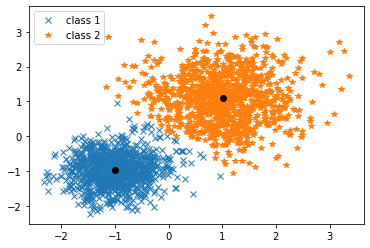

In [4]:
centers, labels = kmeans(samples, 2, max_iter=10)

plt.plot(samples[labels == 1, 0], samples[labels == 1, 1], 'x')
plt.plot(samples[labels == 0, 0], samples[labels == 0, 1], '*')
plt.legend({'class 1', 'class 2'})
plt.plot(centers[:, 0], centers[:, 1], 'ko')
